#Chapter 2

Methods covered:

+ open(path).readline()  
+ json.loads(line)  
+ df.value_counts() 
+ frame['tz'].fillna('missing')
+ pd.Series([x.split[0] for x in frame.a.dropna])  
+ np.where(condition, x when Ture, y when False)  
+ df.groupby([key1, key2])  
+ groupby_obj.size()  - similar to value_counts()  
+ .unstack()  
+ .argsort()  - return index to sort the series  
+ array.take(indexer) - fancy indexing using arrays  
+ std_count = count_subset.div(count_subset.sum(1), axis=0) - standerdize  

+ pd.read_table('Data/movies.dat', sep='::', header=None, names=mnames)  
+ df.ix  -- combination of .loc and .iloc  
+ pd.merge(df1, df2, on=key)  
+ df.pivot_table('rating', rows='title', cols='gender', aggfunc='mean') -   
+ data.groupby('title').size() - size of each group  
+ active_titles = rating_by_title.index[rating_by_title >= 250]  
+ df.sort_index(by='F', ascending=False)
+ sorted_by_diff\[::-1][:15] - reverse order and slice  
+ data.groupby('title')['rating'].std() -- group by title and calculate the rating std  

+ names = names.groupby(['year', 'sex']).apply(add_prop) - group operation using apply  
+ names1880.groupby('sex').births.sum()  
+ read and concat multiple files  
+ np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)  
+ prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()  
+ def get_quantile_count(group, q=0.5):  
    group = group.sort_index(by='prop', ascending=False)  
    return group.prop.cumsum().searchsorted(q)[0]  
+ Series.map(func/series/dict, na_action=None)  
+ subtable = table.reindex(columns=[1900, 2000, 2010], level='year')  
+ all_names = top1000.name.unique()  
    mask = np.array(['lesl' in x.lower() for x in all_names])  
    lesley_like = all_names[mask]  
+ filtered = top1000[top1000.name.isin(lesley_like)]  
    prop = table.div(table.sum(1), axis=0)  

##Count timezone using Python

In [122]:
import json
from collections import defaultdict, Counter
# fix the unicode encoding error
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [1]:
path = 'C:\Users\YDuan\GitHub Repos\Python-for-Data-Analysis\Data\usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
records = [json.loads(line) for line in open(path)]
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [8]:
records[0]['tz']

u'America/New_York'

In [10]:
timezone = [rec['tz'] for rec in records if 'tz' in rec]


[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Asia/Hong_Kong',
 u'Asia/Hong_Kong',
 u'America/New_York',
 u'America/Denver',
 u'Europe/Rome',
 u'Africa/Ceuta',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Madrid',
 u'Asia/Kuala_Lumpur',
 u'Asia/Nicosia',
 u'America/Sao_Paulo',
 u'',
 u'',
 u'Europe/London',
 u'America/New_York',
 u'Pacific/Honolulu',
 u'America/Chicago',
 u'',
 u'',
 u'Pacific/Honolulu',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'America/Chicago',
 u'Europe/Rome',
 u'America/New_York',
 u'America/New_York',
 u'America/Los_Angeles',
 u'',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Malta',
 u'America/New_York',
 u'America/New_York',
 u'',
 u'America/Los_Angeles',
 u'America/Sao_Pa

In [12]:
def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence: counts[x] += 1
    return counts

In [17]:
counts = get_counts(timezone)

In [20]:
counts = Counter(timezone)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

##Count timezone with pandas

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

In [25]:
frame = pd.DataFrame(records)
frame['tz'].value_counts()[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

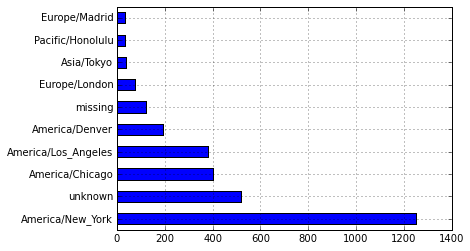

In [67]:
clean_tz = frame['tz'].fillna('missing')
clean_tz[clean_tz == ''] = 'unknown'
clean_tz[clean_tz == ' '] = 'unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10].plot(kind='barh', rot=0)

##Parsing data

In [46]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

Only the timezone of Windows users:

In [77]:
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
tz_by_os = cframe.groupby(['tz', operating_system])
agg_counts = tz_by_os.size().unstack().fillna(0)

In [78]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [73]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


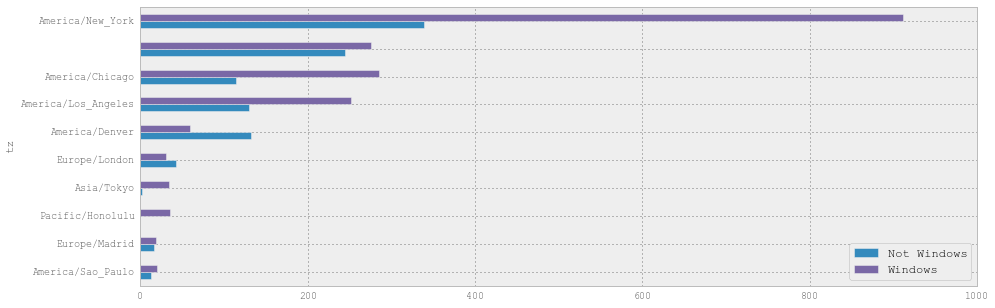

In [82]:
count_subset.plot(kind='barh')

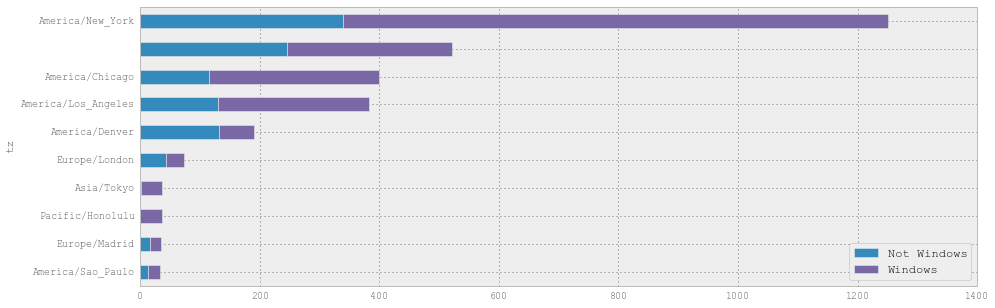

In [83]:
count_subset.plot(kind='barh', stacked=True)

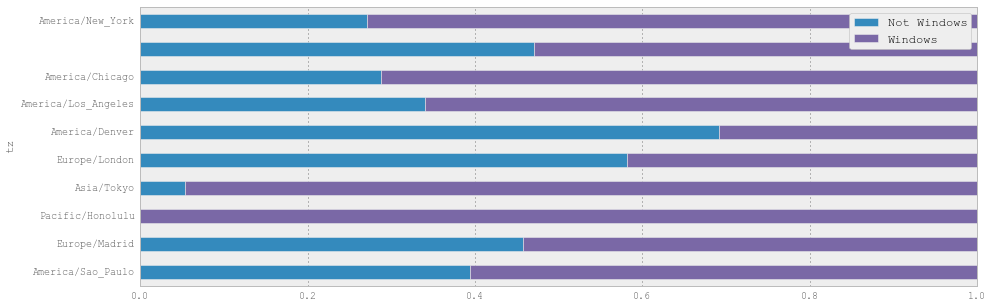

In [85]:
std_count = count_subset.div(count_subset.sum(1), axis=0)
std_count.plot(kind='barh', stacked=True)

##MovieLens 1M dataset

In [93]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('Data/users.dat', sep='::', header=None, names=unames)

In [94]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('Data/ratings.dat', sep='::', header=None, names=rnames)

In [95]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('Data/movies.dat', sep='::', header=None, names=mnames)

In [100]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [102]:
data.ix[0] # df.ix 

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [120]:
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [123]:
rating_by_title = data.groupby('title').size()
active_titles = rating_by_title.index[rating_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)', u'28 Days (2000)', u'39 Steps, The (1935)', u'54 (1998)', u'7th Voyage of Sinbad, The (1958)', u'8MM (1999)', u'About Last Night... (1986)', u'Absent Minded Professor, The (1961)', u'Absolute Power (1997)', u'Abyss, The (1989)', u'Ace Ventura: Pet Detective (1994)', u'Ace Ventura: When Nature Calls (1995)', u'Addams Family Values (1993)', u'Addams Family, The (1991)', u'Adventures in Babysitting (1987)', u'Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)', u'Adventures of Priscilla, Queen of the Desert, The (1994)', u'Adventures of Robin Hood, The (1938)', u'African Queen, The (1951)', u'Age of Innocence, The (1993)', u'Agnes of God (1985)', u'Air America (1990)', u'Air Force One

In [124]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [125]:
top_femail_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_femail_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [129]:
mean_ratings['diff'] = mean_ratings['M'] -  mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [130]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [138]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title[active_titles]
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [141]:
# this does the same
data.pivot_table('rating', rows='title', aggfunc='std')[active_titles].order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

##US Baby dataset

In [331]:
names1880 = pd.read_csv('data/yob1880.txt', names=['name','sex','births'])
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [145]:
names1880.groupby('sex').size()

sex
F       942
M      1058
dtype: int64

In [148]:
names1880.groupby('sex')['births'].sum()
names1880.groupby('sex').births.sum()

sex
F       90993
M      110491
Name: births, dtype: int64

In [150]:
years = range(1880, 2014)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'data/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [151]:
names = pd.concat(pieces, ignore_index=True) # concat by row by default

In [155]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [157]:
total_births = names.pivot_table('births', rows='year', cols='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2009,1832925,1979303
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463


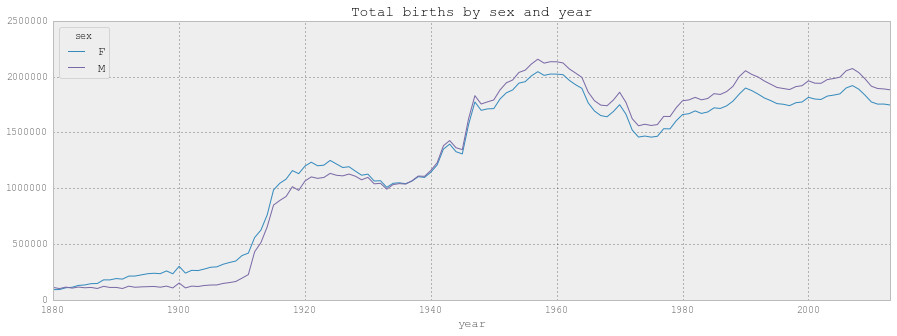

In [159]:
total_births.plot(title='Total births by sex and year')


In [165]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [169]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [174]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [175]:
def get_top1000(group):
    return group.sort_index(by='prop', ascending=False)[:1000]

In [176]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [179]:
boys = top1000[top1000['sex']=='M']
girls = top1000[top1000['sex']=='F']

In [181]:
total_births = top1000.pivot_table('births', rows='year', cols='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016AA8710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015715978>], dtype=object)

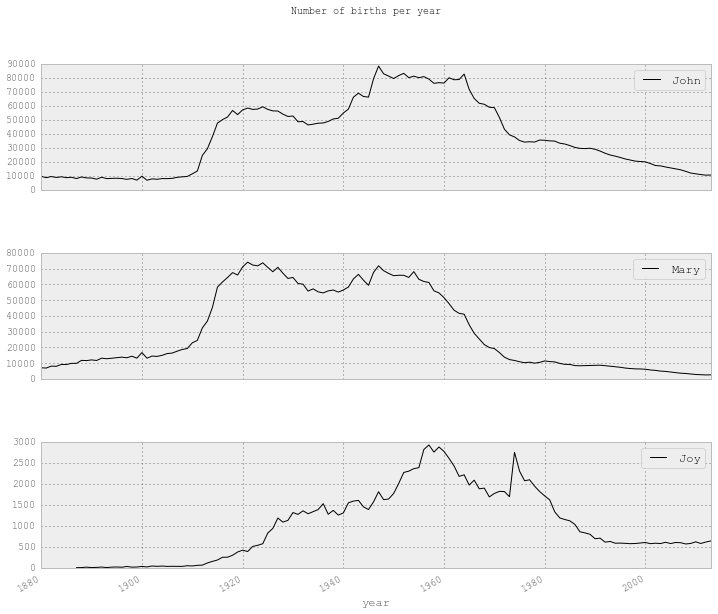

In [184]:
subset = total_births[['John', 'Mary', 'Joy']]
subset.plot(subplots=True, figsize=(12,10), title='Number of births per year')

In [330]:
prop = total_births / np.nansum(total_births, axis=0)

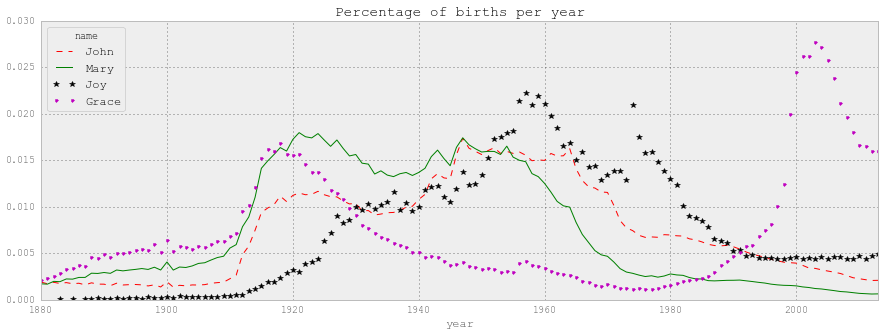

In [199]:
subset = prop[['John', 'Mary', 'Joy', 'Grace']]
subset.plot(title='Percentage of births per year', style=['r--', 'g-', 'k*', 'm.'])

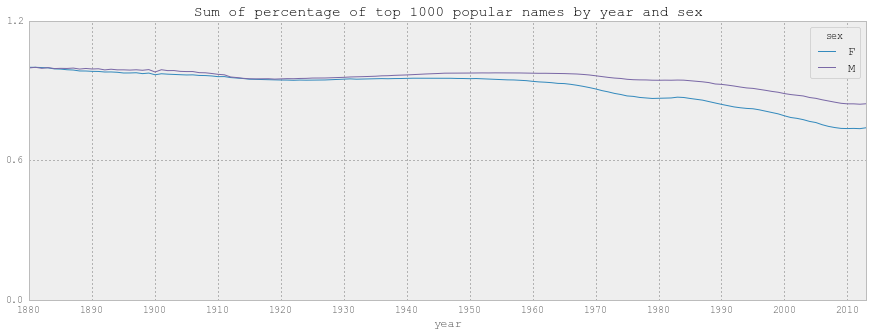

In [203]:
table = top1000.pivot_table('prop', rows='year', cols='sex', aggfunc=sum)
table.plot(title='Sum of percentage of top 1000 popular names by year and sex', yticks=np.linspace(0, 1.2, 3), 
           xticks=range(1880, 2020, 10))

In [232]:
top_boy_name_2013 = boys.ix[2013].sort_index(by='prop', ascending=False).name[:5]
top_girl_name_2013 = girls.ix[2013].sort_index(by='prop', ascending=False).name[:5]
subset_2013 = prop[list(top_girl_name_2013) + list(top_boy_name_2013)]

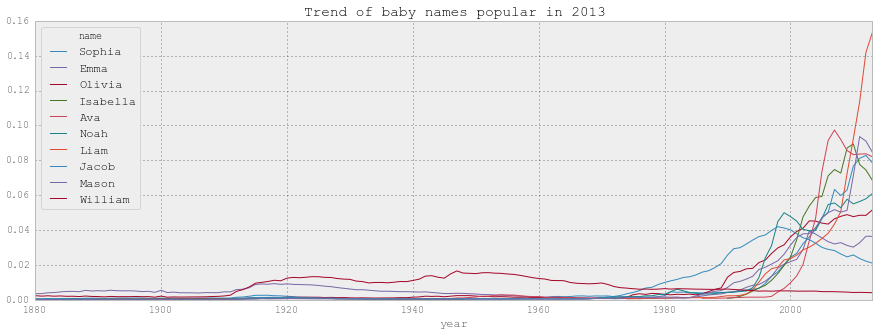

In [233]:
subset_2013.plot(title='Trend of baby names popular in 2013')

In [260]:
prop_cumsum.searchsorted(0.5)

array([240], dtype=int64)

In [255]:
df = girls[girls.year==2013]
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

array([240])

In [240]:
df = girls[girls.year==1880]
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

array([37], dtype=int64)

In [261]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]

In [262]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15


In [268]:
diversity.columns = ['Female', 'Male']

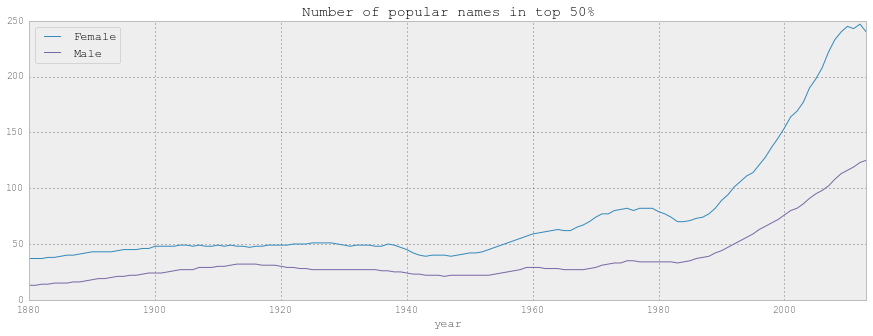

In [271]:
diversity.plot(title='Number of popular names in top 50%')

In [278]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', rows=last_letters, cols=['sex', 'year'], aggfunc=sum)

In [283]:
subtable = table.reindex(columns=[1900, 2000, 2010], level='year')
last_letter_prop = subtable/subtable.sum()

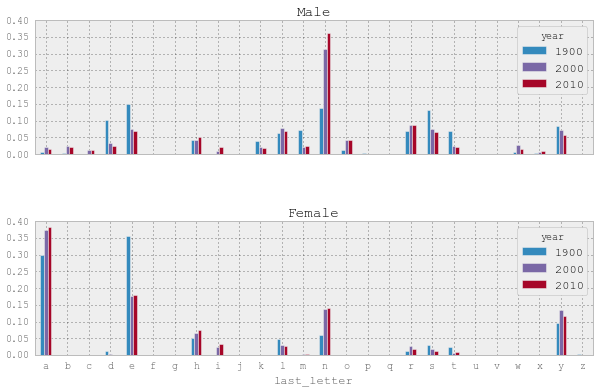

In [299]:
fig, axes = plt.subplots(2,1,figsize=(10,6))
last_letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
last_letter_prop['F'].plot(kind='bar',rot=0, ax=axes[1], title='Female')

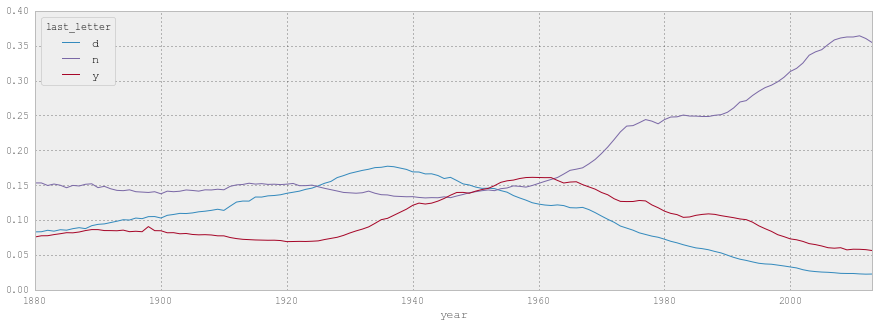

In [303]:
dny_ts = (table/table.sum()).ix[['d','n','y'],'M'].T
dny_ts.plot()

In [309]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [311]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby(['name']).births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    374135
Lesly      11154
Name: births, dtype: int64

In [322]:
table = filtered.groupby(['year', 'sex']).births.sum()
table = table.unstack('sex')
prop = table.div(table.sum(1), axis=0) # sum over sex 
prop.tail()

sex,F,M
year,,
2009,1,NaN
2010,1,NaN
2011,1,NaN
2012,1,NaN
2013,1,NaN


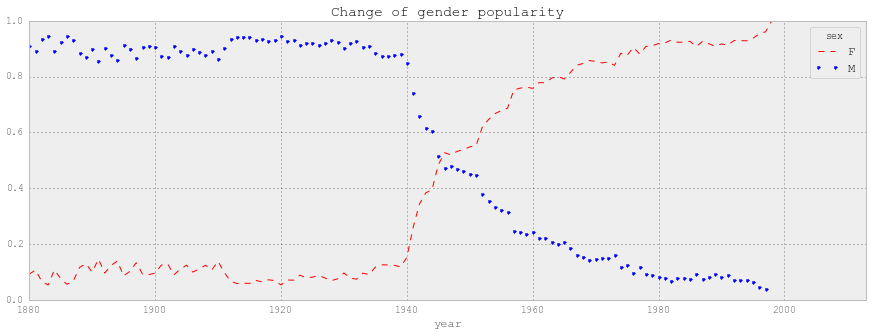

In [329]:
prop.plot(style={'M':'b.','F':'r--'}, title='Change of gender popularity')